In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
titanic=pd.read_csv("titanic_train.csv")

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic=titanic[['Pclass','Sex','Age','SibSp','Parch','Embarked','Survived']]

In [7]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
titanic.iloc[:,1]=LabelEncoder().fit_transform(titanic.iloc[:,1])
titanic.iloc[:,5]=titanic.iloc[:,5].fillna('C')
#titanic.iloc[:,5]=titanic.iloc[:,5].astype('str')
titanic.iloc[:,5]=LabelEncoder().fit_transform(titanic.iloc[:,5])

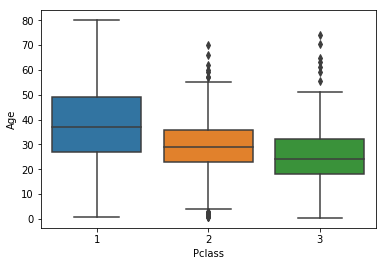

In [11]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [12]:
age_count=[37,30,25]
for i in range(len(titanic)):
    if titanic.iloc[i,0]==1 and pd.isnull(titanic.iloc[i,2]):
        titanic.iloc[i,2]=age_count[0]
    if titanic.iloc[i,0]==2 and pd.isnull(titanic.iloc[i,2]):
        titanic.iloc[i,2]=age_count[1]   
    if titanic.iloc[i,0]==3 and pd.isnull(titanic.iloc[i,2]):
        titanic.iloc[i,2]=age_count[2]
        

In [13]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,22.0,1,0,2,0
1,1,0,38.0,1,0,0,1
2,3,0,26.0,0,0,2,1
3,1,0,35.0,1,0,2,1
4,3,1,35.0,0,0,2,0


In [14]:
X=titanic.iloc[:,:-1].values
y=titanic.iloc[:,-1].values
#X=OneHotEncoder(categorical_features=[0,5]).fit_transform(X).toarray()

In [43]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=6)#6

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50)#40
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred=clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8340807174887892

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=15)
from sklearn.neighbors import KNeighborsClassifier #importing KNeighborsClassifier algo
knn=KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7757847533632287

In [75]:
##1
class_wise_survived=titanic.groupby('Pclass')['Survived'].agg('count')

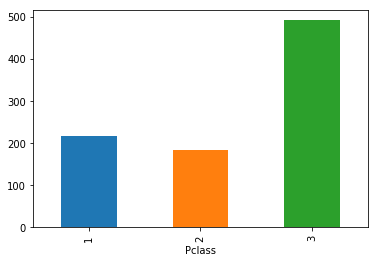

In [76]:
class_wise_survived.plot(kind='bar')

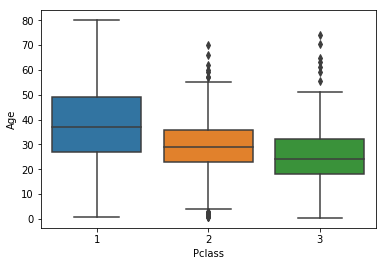